In [8]:
pip install minisom

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


# Binance Data Clustering

In [1]:
import os
import json
import pandas as pd
import datetime
import matplotlib.pylab as plt
import numpy as np

## Read Data

In [2]:
Close=pd.read_csv("C://Users/lunab/plot/Close_except.csv",index_col=0)
name_list=list(Close.columns)

In [3]:
name_list=list(Close.columns)

In [4]:
Close

,1INCH,AAVE,ACM,ADA,ADX,AGLD,AION,AKRO,ALCX,ALGO,...,XTZ,XVG,XVS,YFII,YFI,YGG,ZEC,ZEN,ZIL,ZRX
1609820400000,1.0308,106.207,NaN,0.21500,NaN,NaN,0.0693,0.009213,NaN,0.4171,...,2.2082,NaN,3.432,1495.00,22452.41,NaN,58.67,13.030,0.06716,0.3892
1609820700000,1.0250,106.043,NaN,0.21467,NaN,NaN,0.0683,0.009132,NaN,0.4172,...,2.2118,NaN,3.421,1492.44,22474.03,NaN,58.70,12.977,0.06726,0.3888
1609821000000,1.0392,107.053,NaN,0.21546,NaN,NaN,0.0687,0.009121,NaN,0.4213,...,2.2165,NaN,3.438,1497.57,22685.98,NaN,58.81,12.973,0.06727,0.3953
1609821300000,1.0393,106.972,NaN,0.21572,NaN,NaN,0.0676,0.009089,NaN,0.4198,...,2.2203,NaN,3.428,1500.51,22633.66,NaN,58.74,12.930,0.06728,0.3964
1609821600000,1.0441,107.176,NaN,0.21600,NaN,NaN,0.0676,0.009117,NaN,0.4192,...,2.2145,NaN,3.415,1499.01,22710.64,NaN,58.74,12.957,0.06722,0.3966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641355200000,2.5370,257.000,5.142,1.33100,0.5677,1.666,0.1513,0.025150,309.0,1.7502,...,5.2240,0.01778,16.480,2963.00,37192.81,5.246,149.90,66.480,0.07167,0.9173
1641355500000,2.5390,256.500,5.142,1.33100,0.5682,1.663,0.1512,0.025130,308.6,1.7515,...,5.2080,0.01777,16.470,2959.00,37110.03,5.241,149.70,66.330,0.07153,0.9169
1641355800000,2.5410,256.600,5.142,1.33500,0.5685,1.663,0.1510,0.025160,307.6,1.7518,...,5.2330,0.01782,16.480,2963.00,37167.79,5.275,149.90,66.630,0.07172,0.9190
1641356100000,2.5400,256.500,5.137,1.33300,0.5684,1.663,0.1511,0.025170,307.6,1.7492,...,5.2570,0.01785,16.470,2968.00,37175.00,5.270,149.70,66.750,0.07175,0.9174


## Close 시간 단위 수정

In [5]:
def re_index(hour):
    t=1609822800000 #2021/01/05/       14:00
    temp=[]
    while t<1641356400000:#끝시간
        temp.append(t)
        t+=3600000*hour #시간 단위 입력하기(1시간 : 3600000)
        
    df=pd.DataFrame(list(range(len(temp))),index=temp)
    for i in name_list:
        df=df.join(Close[i],how='left')
    df=df.drop(0,axis=1)
    
    Close_re=pd.DataFrame()
    for a in name_list:
        start=pd.DataFrame.first_valid_index(df[a])
        temp2=df[a].loc[start:]
        if temp2.isnull().values.any()==True:
            temp2=temp2.interpolate(method='values')
        Close_re=pd.concat([Close_re,temp2],axis=1)         
    
    return Close_re

In [107]:
Close

,1INCH,AAVE,ACM,ADA,ADX,AGLD,AION,AKRO,ALCX,ALGO,...,XTZ,XVG,XVS,YFII,YFI,YGG,ZEC,ZEN,ZIL,ZRX
1609822800000,1.0309,105.979000,NaN,0.214770,NaN,NaN,0.06800,0.009173,NaN,0.419200,...,2.228900,NaN,3.4200,1491.950000,22613.340000,NaN,58.650000,13.024000,0.067290,0.3974
1609826400000,1.0370,107.337167,NaN,0.218278,NaN,NaN,0.06835,0.009227,NaN,0.426733,...,2.242783,NaN,3.4375,1496.231667,22678.983333,NaN,58.758333,13.084333,0.067653,0.3994
1609830000000,1.0431,108.695333,NaN,0.221787,NaN,NaN,0.06870,0.009281,NaN,0.434267,...,2.256667,NaN,3.4550,1500.513333,22744.626667,NaN,58.866667,13.144667,0.068017,0.4014
1609833600000,1.0492,110.053500,NaN,0.225295,NaN,NaN,0.06905,0.009334,NaN,0.441800,...,2.270550,NaN,3.4725,1504.795000,22810.270000,NaN,58.975000,13.205000,0.068380,0.4034
1609837200000,1.0553,111.411667,NaN,0.228803,NaN,NaN,0.06940,0.009388,NaN,0.449333,...,2.284433,NaN,3.4900,1509.076667,22875.913333,NaN,59.083333,13.265333,0.068743,0.4054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641340800000,2.5040,254.900000,5.12,1.323000,0.5663,1.662,0.15440,0.024700,308.0,1.680600,...,5.096000,0.01751,16.1500,2944.000000,36345.650000,5.247,148.800000,65.480000,0.071560,0.9023
1641344400000,2.5040,254.900000,5.12,1.323000,0.5663,1.662,0.15440,0.024700,308.0,1.680600,...,5.096000,0.01751,16.1500,2944.000000,36345.650000,5.247,148.800000,65.480000,0.071560,0.9023
1641348000000,2.5040,254.900000,5.12,1.323000,0.5663,1.662,0.15440,0.024700,308.0,1.680600,...,5.096000,0.01751,16.1500,2944.000000,36345.650000,5.247,148.800000,65.480000,0.071560,0.9023
1641351600000,2.5040,254.900000,5.12,1.323000,0.5663,1.662,0.15440,0.024700,308.0,1.680600,...,5.096000,0.01751,16.1500,2944.000000,36345.650000,5.247,148.800000,65.480000,0.071560,0.9023


In [108]:
import operator
import datetime
import time
start_time_epoch={}#모든 코인의 데이터 저장 시작점을 Epoch시간으로 저장
start_time={}
for i in range(len(name_list)):
    temp1=Close[name_list[i]]
    temp2=pd.DataFrame.first_valid_index(temp1)+(300000*12*24*20)#20일 이후로 생성
    start_time_epoch[name_list[i]]=temp2
    if temp2!=1609822800000+(300000*12*24*20) : #DataFrame 시작점 : 2021-01-05 14:00
        temp2=str(temp2)
        temp2=temp2[:10]
        temp2=int(temp2)
        time1 = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(temp2))
        start_time[name_list[i]]=time1

#start_time 시간순서대로 재정렬        
start_time=dict(sorted(start_time.items(), key=operator.itemgetter(1))) #튜플로 정렬이 되서 dict으로 다시 묶어줘야한다

In [110]:
not_ori_coin=[k for k in start_time.keys()]
ori_coin=sorted(list(set(name_list)-set(not_ori_coin)))
len(ori_coin)+len(not_ori_coin)

297

### Coin Market Cap
MC : binance사이트의 marketcap 374위까지 순서<br>
MarketCap : MC중 datad에 존재하는 coin들의 Market Cap

In [97]:
MarketCap=[]
MC=['BTC','ETH','BNB','USDT','SOL','USDC','ADA','XRP','LUNA','DOT','AVAX','DOGE','MATIC','SHIB','BUSD','LINK','WBTC','NEAR','UST','UNI','ALGO','LTC','ATOM','FTM','BCH','TRX','ICP','XLM','FTT','MANA','HBAR','VET','SAND','AXS','FIL','EGLD','THETA','ETC','XTZ','ONE','HNT','KLAY','XMR','AAVE','CAKE','EOS','STX','GRT','BTT','GALA','FLOW','KSM','RUNE','CRV','MKR','ENJ','LRC','QNT','ZEC','CELO','XEC','CVX','AMP','AR','NEO','BAT','CHZ','ROSE','WAVES','DASH','TUSD','MINA','SPELL','COMP','YFI','RVN','HOT','XEM','IOTX','1INCH','SCRT','USDP','TFUEL','SUSHI','BNT','OMG','DCR','LPT','WAXP','ZIL','QTUM','ANKR','AUDIO','RENBTC','KAVA','RNDR','ICX','ZEN','IMX','SYS','PERP','SC','FLUX','BTG','FXS','ZRX','SNX','STORJ','CKB','UMA','ENS','ONT','IOST','ILV','SKL','HIVE','OCEAN','DYDX','REN','NU','C98','MOVR','TRIBE','CHR','RAY','CELR','DGB','POLY','SUPER','NANO','SRM','ANY','GLM','KEEP','WIN','YGG','FET','JST','ANT','DENT','RSR','PLA','JASMY','ALICE','WRX','MBOX','PAXG','SXP','RGT','BICO','ALCX','INJ','KP3R','CTSI','REQ','COTI','MASK','POWR','KNC','DUSK','PYR','LSK','MDX','BTCST','REEF','JOE','ALPHA','VTHO','CFX','PUNDIX','ACH','TWT','XVG','RLC','ELF','CVC','OXT','ARDR','BCD','NKN','RAD','POLS','OGN','SUN','ORN','DAR','SNT','STMX','ONG','BAND','REP','BAKE','UTK','PROM','STRAX','NMR','AGIX','XVS','GTC','MC','TLM','STEEM','BADGER','TRU','VOXEL','ARK','RIF','GHST','MIR','TOMO','MLN','EPS','IDEX','FIDA','BETA','CLV','MTL','STPT','SFP','BAL','FUN','IRIS','QKC','LINA','TKO','TVK','ERN','WAN','YFII','IQ','LTO','PHA','AGLD','MBL','ATA','CHESS','BTS','ARPA','WNXM','FARM','QUICK','CTK','DODO','BIFI','KMD','RARE','AERGO','MFT','AVA','BOND','LIT','DATA','COS','TROY','FORTH','CTXC','LOOM','COCOS','DIA','TRB','HARD','ALPACA','AKRO','DNT','ADX','FIO','BNX','NULS','BEL','RAMP','AION','MDT','BLZ','FIRO','SLP','WTC','KEY','OM','FLM','GAS','BEAM','GRS','CVP','MITH','DEGO','FRONT','PSG','AUCTION','BURGER','DREP','DOCK','DF','BRD','POND','HEGIC','UNFI','FOR','QI','GTO','AST','NBS','PNT','VIDT','VITE','CITY','LAZIO','DEXE','PERL','PIVX','GO','TORN','AUTO','CREAM','WING','NXS','BAR','QSP','PORTO','TCT','SUSD','SPARTA','NAV','NAS','UFT','WABI','NEBL','CND','SANTOS','ACM','ATM','PHB','OAX','AMB','NCASH','FIS','JUV','SNM','MTH','ASR','MDA','EZ','VIB','QLC','OG','PROS','ADADOWN','ADAUP','AUD','BETH','BNBDOWN','BNBUP','BTCDOWN','BTCUP','DOTDOWN','DOTUP','ETHDOWN','ETHUP','EUR','GBP','GXS','HIGH','IOTA','LINKDOWN','LINKUP','LTCDOWN','LTCUP','PEOPLE','TRXDOWN','TRXUP','XRPDOWN','XRPUP','XTZDOWN','XTZUP','YOYO']

for i in range(len(MC)):
    if MC[i] in name_list:
        MarketCap.append(MC[i])

# K-means Clustering

In [118]:
import math 
import time 
import datetime


# Native libraries
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [354]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #표준화 패키지 라이브러리
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import dataframe_image as dfi
from sklearn.decomposition import PCA

%matplotlib inline

import os
os.chdir('C:\\Users\\lunab\\plot\\Clustering\\K-Means') #그림 저장 위치 변경

### 함수

### findmarketcap(Coin Name List, epochtime(분할기준))
: marketcap으로 정렬하되 정해진 epochtime을 기준을 넘어가는 coin들은 목록에서 제외한 뒤 데이터 프레임 생성 

In [346]:
def findmarketcap(name,epoch):
    print("제거된 coin")
    c=len(name)-1
    a=len(name)-1
    compare=0
    count=0
    find=0
    re_coin=[]
    
    while count<=a:#name개수만큼 반복
        name[count]
        i=name[count]
        if start_time_epoch[i]>epoch:
            print(i, start_time[i])
            name.remove(i)
            c+=1
            find+=1
            name.append(MarketCap[c])
        else:
            count+=1
    
    for i in name:
        if i in not_ori_coin and start_time_epoch[i]>compare:
            compare=start_time_epoch[i]
            compare_name=i

    
    if find>0:
        print("개수 : "+str(find)+"\n기간 : "+start_time[compare_name]+" - 2022/01/05 13:20:00 ("+compare_name+"상장시점 기준)")
        print()
    else:
        print("없음")
    df=Close[name]
    df=df.loc[compare:1641355200000]
    return df

## 1. MarketCap Top 10

In [410]:
name_10=MarketCap[:10]

In [411]:
mc_10=Close[name_10]

In [412]:
mc_10

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE
1609822800000,31282.260000,1022.610,39.800300,2.25000,0.214770,0.229520,0.671200,9.387400,3.608600,0.009158
1609826400000,31292.783333,1022.995,39.880567,2.25585,0.218278,0.230307,0.678617,9.389233,3.693433,0.009219
1609830000000,31303.306667,1023.380,39.960833,2.26170,0.221787,0.231093,0.686033,9.391067,3.778267,0.009279
1609833600000,31313.830000,1023.765,40.041100,2.26755,0.225295,0.231880,0.693450,9.392900,3.863100,0.009340
1609837200000,31324.353333,1024.150,40.121367,2.27340,0.228803,0.232667,0.700867,9.394733,3.947933,0.009401
...,...,...,...,...,...,...,...,...,...,...
1641340800000,46126.750000,3813.990,509.700000,168.85000,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200
1641344400000,46126.750000,3813.990,509.700000,168.85000,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200
1641348000000,46126.750000,3813.990,509.700000,168.85000,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200
1641351600000,46126.750000,3813.990,509.700000,168.85000,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200


In [413]:
#minmax시 “ValueError: Expected 2D array, got 1D array instead”발생 -> 데이터 프레임으로 변환후 minmax적용
x=mc_10
x=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(x,columns=[name_10])
x.columns=name_10
x

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE
0,0.043180,0.021608,0.006471,0.001173,0.000000,0.001924,0.000000,0.041041,0.000000,0.002823
1,0.043450,0.021707,0.006596,0.001196,0.001237,0.002387,0.000074,0.041081,0.000617,0.002907
2,0.043721,0.021806,0.006721,0.001219,0.002473,0.002850,0.000148,0.041121,0.001234,0.002991
3,0.043991,0.021904,0.006846,0.001242,0.003710,0.003313,0.000222,0.041160,0.001850,0.003075
4,0.044261,0.022003,0.006971,0.001265,0.004946,0.003776,0.000296,0.041200,0.002467,0.003159
...,...,...,...,...,...,...,...,...,...,...
8755,0.424367,0.736777,0.738604,0.655022,0.390603,0.355262,0.845899,0.467036,0.732861,0.224516
8756,0.424367,0.736777,0.738604,0.655022,0.390603,0.355262,0.845899,0.467036,0.732861,0.224516
8757,0.424367,0.736777,0.738604,0.655022,0.390603,0.355262,0.845899,0.467036,0.732861,0.224516
8758,0.424367,0.736777,0.738604,0.655022,0.390603,0.355262,0.845899,0.467036,0.732861,0.224516


In [414]:
mySeries = []
namesofMySeries = name_10
for i in name_10:
    mySeries.append(x[i].squeeze())

In [415]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
labels = km.fit_predict(mySeries)

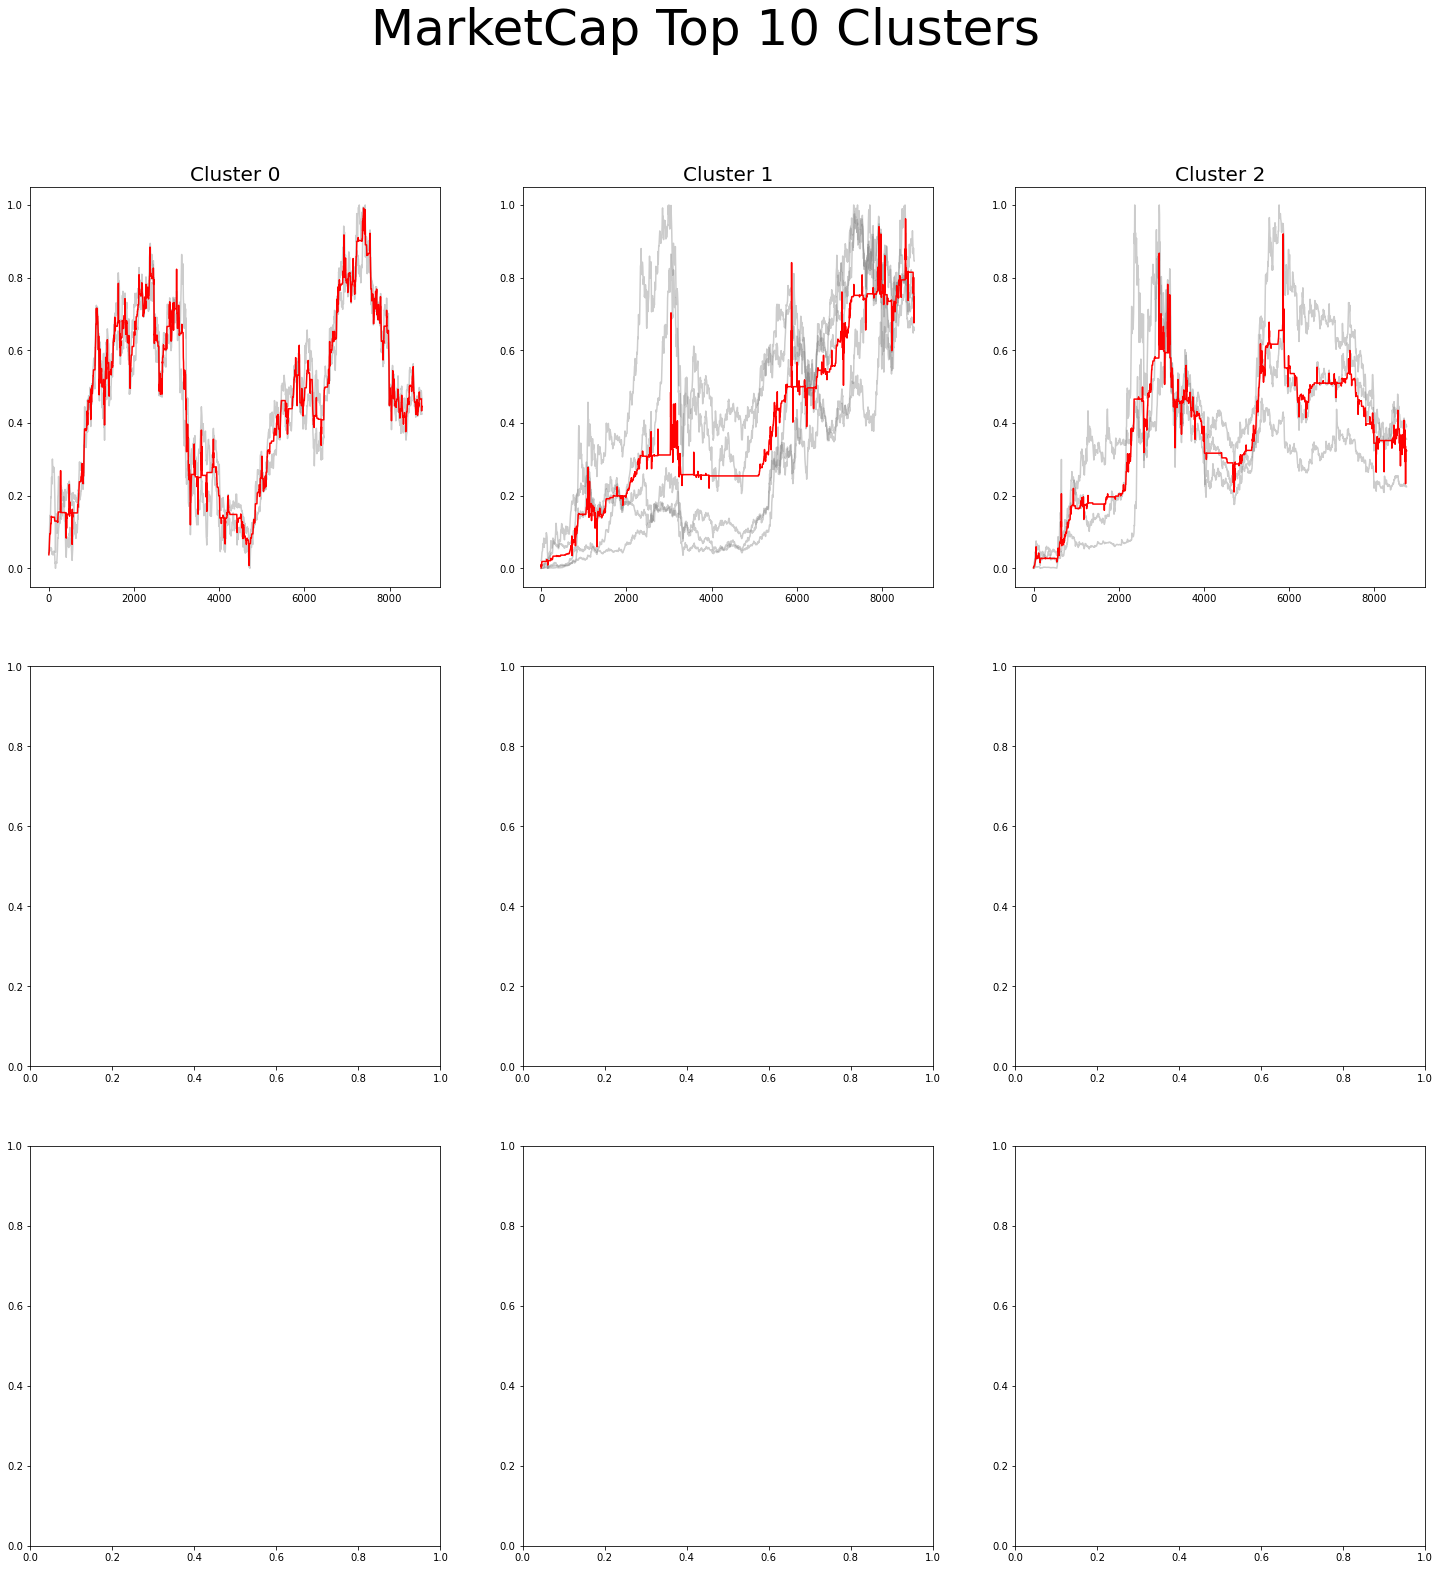

In [421]:
plot_count = 3

fig, axs = plt.subplots(plot_count, plot_count,figsize=(25,25))
fig.suptitle('MarketCap Top 10 Clusters',fontsize=50)
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*1+column_j),fontsize=20)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.savefig('mc_10', facecolor='white',dpi=300)                
plt.show()

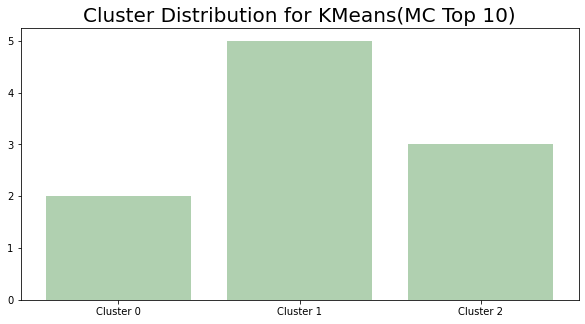

In [445]:
cluster_c = [len(labels[labels==i]) for i in range(3)]
cluster_n = ["Cluster "+str(i) for i in range(3)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans(MC Top 10)",fontsize=20)
plt.bar(cluster_n,cluster_c, color='darkseagreen',alpha=0.7)
plt.savefig('mc_10_d', dpi=300)        
plt.show()

In [446]:
labels

array([0, 1, 1, 1, 2, 2, 1, 0, 1, 2], dtype=int64)

In [450]:
mc_10_labels=np.array([0, 1, 1, 1, 2, 2, 1, 0, 1, 2])

In [451]:
temp={}

for i in range(10):
    temp[name_10[i]]=list(labels)[i]

cluster_10={'cluster 0':[],'cluster 1':[],'cluster 2':[]}

count=1
for key, value in temp.items():
    for i in range(3):
        if value==i:
            cluster_10['cluster '+str(i)].append(key+'('+str(count)+')')
            count+=1

In [452]:
cluster_10

{'cluster 0': ['BTC(1)', 'DOT(8)'],
 'cluster 1': ['ETH(2)', 'BNB(3)', 'SOL(4)', 'LUNA(7)', 'AVAX(9)'],
 'cluster 2': ['ADA(5)', 'XRP(6)', 'DOGE(10)']}

## 2. MarketCap Top 20

In [468]:
name_20=MarketCap[:20]

In [469]:
mc_20=findmarketcap(name_20,1641351600000-(300000*12*24*90))

제거된 coin
없음


In [470]:
mc_20

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE,MATIC,SHIB,LINK,NEAR,UNI,ALGO,LTC,ATOM,FTM,BCH
1622372400000,35800.010000,2407.820000,332.870000,28.799000,1.63020,0.879800,5.969000,20.837000,17.160000,0.304360,1.870640,0.000008,28.199000,3.265200,24.844000,0.876600,175.990000,12.8180,0.301330,673.39
1622376000000,35798.498333,2409.856667,332.023333,28.684667,1.63125,0.881733,6.012167,20.842333,17.130333,0.304333,1.875202,0.000008,28.187167,3.257567,24.908667,0.876917,175.811667,12.8335,0.300408,672.45
1622379600000,35796.986667,2411.893333,331.176667,28.570333,1.63230,0.883667,6.055333,20.847667,17.100667,0.304307,1.879763,0.000008,28.175333,3.249933,24.973333,0.877233,175.633333,12.8490,0.299487,671.51
1622383200000,35795.475000,2413.930000,330.330000,28.456000,1.63335,0.885600,6.098500,20.853000,17.071000,0.304280,1.884325,0.000008,28.163500,3.242300,25.038000,0.877550,175.455000,12.8645,0.298565,670.57
1622386800000,35793.963333,2415.966667,329.483333,28.341667,1.63440,0.887533,6.141667,20.858333,17.041333,0.304253,1.888887,0.000008,28.151667,3.234667,25.102667,0.877867,175.276667,12.8800,0.297643,669.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641340800000,46126.750000,3813.990000,509.700000,168.850000,1.32300,0.829900,85.480000,29.090000,104.400000,0.169200,2.379000,0.000033,23.880000,16.545000,18.440000,1.680600,147.000000,42.4500,2.938500,428.80
1641344400000,46126.750000,3813.990000,509.700000,168.850000,1.32300,0.829900,85.480000,29.090000,104.400000,0.169200,2.379000,0.000033,23.880000,16.545000,18.440000,1.680600,147.000000,42.4500,2.938500,428.80
1641348000000,46126.750000,3813.990000,509.700000,168.850000,1.32300,0.829900,85.480000,29.090000,104.400000,0.169200,2.379000,0.000033,23.880000,16.545000,18.440000,1.680600,147.000000,42.4500,2.938500,428.80
1641351600000,46126.750000,3813.990000,509.700000,168.850000,1.32300,0.829900,85.480000,29.090000,104.400000,0.169200,2.379000,0.000033,23.880000,16.545000,18.440000,1.680600,147.000000,42.4500,2.938500,428.80


In [471]:
#minmax시 “ValueError: Expected 2D array, got 1D array instead”발생 -> 데이터 프레임으로 변환후 minmax적용
x=mc_20
x=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(x,columns=[name_20])
x.columns=name_20
x

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE,MATIC,SHIB,LINK,NEAR,UNI,ALGO,LTC,ATOM,FTM,BCH
0,0.159190,0.214998,0.177452,0.025467,0.293480,0.412496,0.012951,0.236713,0.058239,0.516413,0.547933,0.029606,0.605320,0.107747,0.633491,0.106580,0.379926,0.110122,0.044940,0.695413
1,0.159151,0.215655,0.175334,0.024978,0.294002,0.414741,0.013400,0.236837,0.058014,0.516319,0.549992,0.029698,0.604830,0.107251,0.637303,0.106764,0.378952,0.110573,0.044657,0.693084
2,0.159113,0.216312,0.173216,0.024490,0.294524,0.416986,0.013849,0.236961,0.057788,0.516225,0.552052,0.029790,0.604341,0.106754,0.641116,0.106947,0.377979,0.111024,0.044374,0.690754
3,0.159074,0.216969,0.171098,0.024001,0.295046,0.419231,0.014297,0.237084,0.057563,0.516131,0.554111,0.029882,0.603851,0.106258,0.644929,0.107130,0.377006,0.111475,0.044091,0.688425
4,0.159035,0.217626,0.168980,0.023512,0.295567,0.421476,0.014746,0.237208,0.057338,0.516037,0.556171,0.029973,0.603362,0.105762,0.648742,0.107314,0.376032,0.111925,0.043808,0.686095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,0.424367,0.668591,0.619781,0.624211,0.140827,0.354547,0.839409,0.428167,0.720920,0.039843,0.777434,0.371248,0.426657,0.971008,0.255896,0.572289,0.221701,0.971793,0.854467,0.089287
5270,0.424367,0.668591,0.619781,0.624211,0.140827,0.354547,0.839409,0.428167,0.720920,0.039843,0.777434,0.371248,0.426657,0.971008,0.255896,0.572289,0.221701,0.971793,0.854467,0.089287
5271,0.424367,0.668591,0.619781,0.624211,0.140827,0.354547,0.839409,0.428167,0.720920,0.039843,0.777434,0.371248,0.426657,0.971008,0.255896,0.572289,0.221701,0.971793,0.854467,0.089287
5272,0.424367,0.668591,0.619781,0.624211,0.140827,0.354547,0.839409,0.428167,0.720920,0.039843,0.777434,0.371248,0.426657,0.971008,0.255896,0.572289,0.221701,0.971793,0.854467,0.089287


In [474]:
mySeries = []
namesofMySeries = name_20
for i in name_20:
    mySeries.append(x[i].squeeze())

In [475]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")
labels = km.fit_predict(mySeries)

KeyboardInterrupt: 

In [ ]:
plot_count = 3

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('MarketCap Top 20 Clusters',fontsize=50)
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*1+column_j),fontsize=20)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.savefig('mc_20.png', facecolor='white', dpi=300)                
plt.show()

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(3)]
cluster_n = ["Cluster "+str(i) for i in range(3)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans(MC Top 20)",fontsize=20)
plt.bar(cluster_n,cluster_c, color='darkseagreen',alpha=0.7)
plt.savefig('mc_20_d', dpi=300)        
plt.show()

In [ ]:
labels

In [ ]:
mc_20_labels=np.array([0, 2, 2, 2, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1])

In [ ]:
temp={}

for i in range(20):
    temp[name_20[i]]=list(mc_20_labels)[i]

cluster_20={'cluster 0':[],'cluster 1':[],'cluster 2':[]}
count=1    
for key, value in temp.items():
    for i in range(3):
        if value==i:
            cluster_20['cluster '+str(i)].append(key+'('+str(count)+')')
            count+=1

In [ ]:
cluster_20

## 3. MarketCap Top 30

In [ ]:
name_30=MarketCap[:30]

In [ ]:
mc_30=findmarketcap(name_30,1641355200000-(300000*12*24*90))

In [ ]:
mc_30

In [ ]:
#minmax시 “ValueError: Expected 2D array, got 1D array instead”발생 -> 데이터 프레임으로 변환후 minmax적용
x=mc_30
x=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(x,columns=[name_30])
x.columns=name_30
x

In [ ]:
mySeries = []
namesofMySeries = name_30
for i in name_30:
    mySeries.append(x[i].squeeze())

In [ ]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw")

labels = km.fit_predict(mySeries)

In [ ]:
plot_count = 3

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('MarketCap Top 30 Clusters',fontsize=50)
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*1+column_j),fontsize=20)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.savefig('mc_30', facecolor='white', dpi=300)             
plt.show()

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans(MC Top 30)",fontsize=20)
plt.bar(cluster_n,cluster_c, color='darkseagreen',alpha=0.7)
plt.savefig('mc_30_d', dpi=300)        
plt.show()

In [ ]:
labels

In [ ]:
mc_30_labels=np.array([1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2])

In [ ]:
temp={}

for i in range(30):
    temp[name_30[i]]=list(mc_30_labels)[i]

cluster_30={'cluster 0':[],'cluster 1':[],'cluster 2':[]}
count=1    
for key, value in temp.items():
    for i in range(3):
        if value==i:
            cluster_30['cluster '+str(i)].append(key+'('+str(count)+')')
            count+=1

In [ ]:
cluster_30

## 4. MarketCap Top 50

In [ ]:
name_50=MarketCap[:50]

In [ ]:
mc_50=findmarketcap(name_50,1641355200000-(300000*12*24*90))

In [ ]:
mc_50

In [ ]:
#minmax시 “ValueError: Expected 2D array, got 1D array instead”발생 -> 데이터 프레임으로 변환후 minmax적용
x=mc_50
x=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(x,columns=[name_50])
x.columns=name_50
x

In [ ]:
mySeries = []
namesofMySeries = name_50
for i in name_50:
    mySeries.append(x[i].squeeze())

In [ ]:
km = TimeSeriesKMeans(n_clusters=5, metric="dtw")

labels = km.fit_predict(mySeries)

In [ ]:
plot_count = 3

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('MarketCap Top 50 Clusters',fontsize=50)
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*3+column_j),fontsize=20)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.savefig('mc_50', facecolor='white', dpi=300)           
plt.show()

In [ ]:
cluster_count=5

In [ ]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans(MC Top 50)",fontsize=20)
plt.bar(cluster_n,cluster_c, color='darkseagreen',alpha=0.7)
plt.savefig('mc_50_d', dpi=300)     
plt.show()

In [ ]:
labels

In [223]:
len([3, 3, 1, 3, 4, 2, 1, 3, 1, 2, 1, 1, 2, 1, 4, 2, 3, 4, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 0, 3, 2, 0, 4, 1, 1, 3, 4, 4, 4, 0, 1, 3, 0,
       1, 4, 2, 3, 1, 3])

50

In [322]:
mc_50_lables=np.array([3, 3, 1, 3, 4, 2, 1, 3, 1, 2, 1, 1, 2, 1, 4, 2, 3, 4, 1, 2, 2, 0,
       2, 0, 1, 2, 2, 1, 2, 0, 3, 2, 0, 4, 1, 1, 3, 4, 4, 4, 0, 1, 3, 0,
       1, 4, 2, 3, 1, 3])

In [157]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(namesofMySeries,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
EOS,Cluster 0
ETC,Cluster 0
FIL,Cluster 0
FTT,Cluster 0
ICP,Cluster 0
BTT,Cluster 0
SAND,Cluster 1
CRV,Cluster 1
FTM,Cluster 1


In [385]:
temp={}

for i in range(50):
    temp[name_50[i]]=list(mc_50_labels)[i]

cluster_50={'cluster 0':[],'cluster 1':[],'cluster 2':[],'cluster 3':[],'cluster 4':[]}
count=1    
for key, value in temp.items():
    for i in range(5):
        if value==i:
            cluster_50['cluster '+str(i)].append(key+'('+str(count)+')')
            count+=1

In [386]:
cluster_50

{'cluster 0': ['ICP(22)',
  'FTT(24)',
  'FIL(30)',
  'ETC(33)',
  'EOS(41)',
  'BTT(44)'],
 'cluster 1': ['BNB(3)',
  'LUNA(7)',
  'AVAX(9)',
  'MATIC(11)',
  'SHIB(12)',
  'NEAR(14)',
  'FTM(19)',
  'MANA(25)',
  'SAND(28)',
  'ONE(35)',
  'HNT(36)',
  'STX(42)',
  'GALA(45)',
  'CRV(49)'],
 'cluster 2': ['XRP(6)',
  'DOGE(10)',
  'LINK(13)',
  'ALGO(16)',
  'BCH(20)',
  'TRX(21)',
  'XLM(23)',
  'HBAR(26)',
  'VET(27)',
  'AXS(29)',
  'THETA(32)',
  'KSM(47)'],
 'cluster 3': ['BTC(1)',
  'ETH(2)',
  'SOL(4)',
  'DOT(8)',
  'LTC(17)',
  'EGLD(31)',
  'KLAY(37)',
  'GRT(43)',
  'RUNE(48)',
  'MKR(50)'],
 'cluster 4': ['ADA(5)',
  'UNI(15)',
  'ATOM(18)',
  'XTZ(34)',
  'XMR(38)',
  'AAVE(39)',
  'CAKE(40)',
  'FLOW(46)']}

## 5. MarketCap Top 100

In [347]:
name_100=MarketCap[:100]

In [348]:
mc_100=findmarketcap(name_100,1641355200000-(300000*12*24*90))

제거된 coin
CVX 2022-01-13 02:00:00
AMP 2021-12-13 20:00:00
SPELL 2022-01-13 20:00:00
RNDR 2021-12-17 20:00:00
SYS 2021-10-14 20:00:00
FLUX 2021-12-30 20:00:00
FXS 2021-12-30 20:00:00
ENS 2021-11-30 20:00:00
ILV 2021-10-12 20:00:00
개수 : 9
기간 : 2021-10-03 20:00:00 - 2022/01/05 13:20:00 (GALA상장시점 기준)



In [349]:
mc_100

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE,...,STORJ,CKB,UMA,ONT,IOST,SKL,HIVE,OCEAN,DYDX,REN
1633258800000,47873.990000,3400.190000,427.400000,170.270,2.259000,1.045200,43.090000,31.890000,69.770000,0.218700,...,1.192300,0.013150,10.0280,0.860800,0.055290,0.332600,0.681200,0.744700,22.240000,1.206200
1633262400000,47895.666667,3402.913333,427.666667,170.805,2.260833,1.048433,43.138333,31.908333,69.758333,0.219017,...,1.196367,0.013185,10.0525,0.867117,0.055278,0.333117,0.679333,0.742933,22.213667,1.204583
1633266000000,47917.343333,3405.636667,427.933333,171.340,2.262667,1.051667,43.186667,31.926667,69.746667,0.219333,...,1.200433,0.013220,10.0770,0.873433,0.055267,0.333633,0.677467,0.741167,22.187333,1.202967
1633269600000,47939.020000,3408.360000,428.200000,171.875,2.264500,1.054900,43.235000,31.945000,69.735000,0.219650,...,1.204500,0.013255,10.1015,0.879750,0.055255,0.334150,0.675600,0.739400,22.161000,1.201350
1633273200000,47960.696667,3411.083333,428.466667,172.410,2.266333,1.058133,43.283333,31.963333,69.723333,0.219967,...,1.208567,0.013290,10.1260,0.886067,0.055243,0.334667,0.673733,0.737633,22.134667,1.199733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641340800000,46126.750000,3813.990000,509.700000,168.850,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200,...,1.808200,0.022530,9.1530,0.678900,0.032850,0.202300,1.594700,0.950500,8.354000,0.589500
1641344400000,46126.750000,3813.990000,509.700000,168.850,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200,...,1.808200,0.022530,9.1530,0.678900,0.032850,0.202300,1.594700,0.950500,8.354000,0.589500
1641348000000,46126.750000,3813.990000,509.700000,168.850,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200,...,1.808200,0.022530,9.1530,0.678900,0.032850,0.202300,1.594700,0.950500,8.354000,0.589500
1641351600000,46126.750000,3813.990000,509.700000,168.850,1.323000,0.829900,85.480000,29.090000,104.400000,0.169200,...,1.808200,0.022530,9.1530,0.678900,0.032850,0.202300,1.594700,0.950500,8.354000,0.589500


In [350]:
#minmax시 “ValueError: Expected 2D array, got 1D array instead”발생 -> 데이터 프레임으로 변환후 minmax적용
x=mc_100
x=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(x,columns=[name_100])
x.columns=name_100
x

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE,...,STORJ,CKB,UMA,ONT,IOST,SKL,HIVE,OCEAN,DYDX,REN
0,0.088345,0.043155,0.121485,0.249566,0.956960,0.511406,0.114649,0.269963,0.199888,0.368039,...,0.028742,0.001935,0.118593,0.386447,0.798160,0.648734,0.007364,0.068758,0.808789,0.902971
1,0.089301,0.044963,0.122485,0.254209,0.958639,0.517123,0.115389,0.270576,0.199757,0.369956,...,0.030867,0.003628,0.120487,0.398016,0.797813,0.651070,0.006505,0.066106,0.807367,0.900978
2,0.090257,0.046771,0.123485,0.258851,0.960317,0.522841,0.116128,0.271188,0.199626,0.371872,...,0.032992,0.005322,0.122381,0.409585,0.797467,0.653406,0.005646,0.063454,0.805945,0.898985
3,0.091214,0.048580,0.124484,0.263494,0.961996,0.528559,0.116868,0.271801,0.199496,0.373789,...,0.035117,0.007015,0.124275,0.421154,0.797121,0.655741,0.004787,0.060802,0.804524,0.896992
4,0.092170,0.050388,0.125484,0.268136,0.963675,0.534276,0.117608,0.272413,0.199365,0.375706,...,0.037242,0.008708,0.126169,0.432723,0.796775,0.658077,0.003928,0.058149,0.803102,0.894999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.350596,0.455733,0.050947,0.053297,0.132087,0.059675,0.427828,0.377721,0.059166,0.142646
2246,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.350596,0.455733,0.050947,0.053297,0.132087,0.059675,0.427828,0.377721,0.059166,0.142646
2247,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.350596,0.455733,0.050947,0.053297,0.132087,0.059675,0.427828,0.377721,0.059166,0.142646
2248,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.350596,0.455733,0.050947,0.053297,0.132087,0.059675,0.427828,0.377721,0.059166,0.142646


In [351]:
mySeries = []
namesofMySeries = name_100
for i in name_100:
    mySeries.append(x[i].squeeze())

In [352]:
km = TimeSeriesKMeans(n_clusters=7, metric="dtw")

labels = km.fit_predict(mySeries)

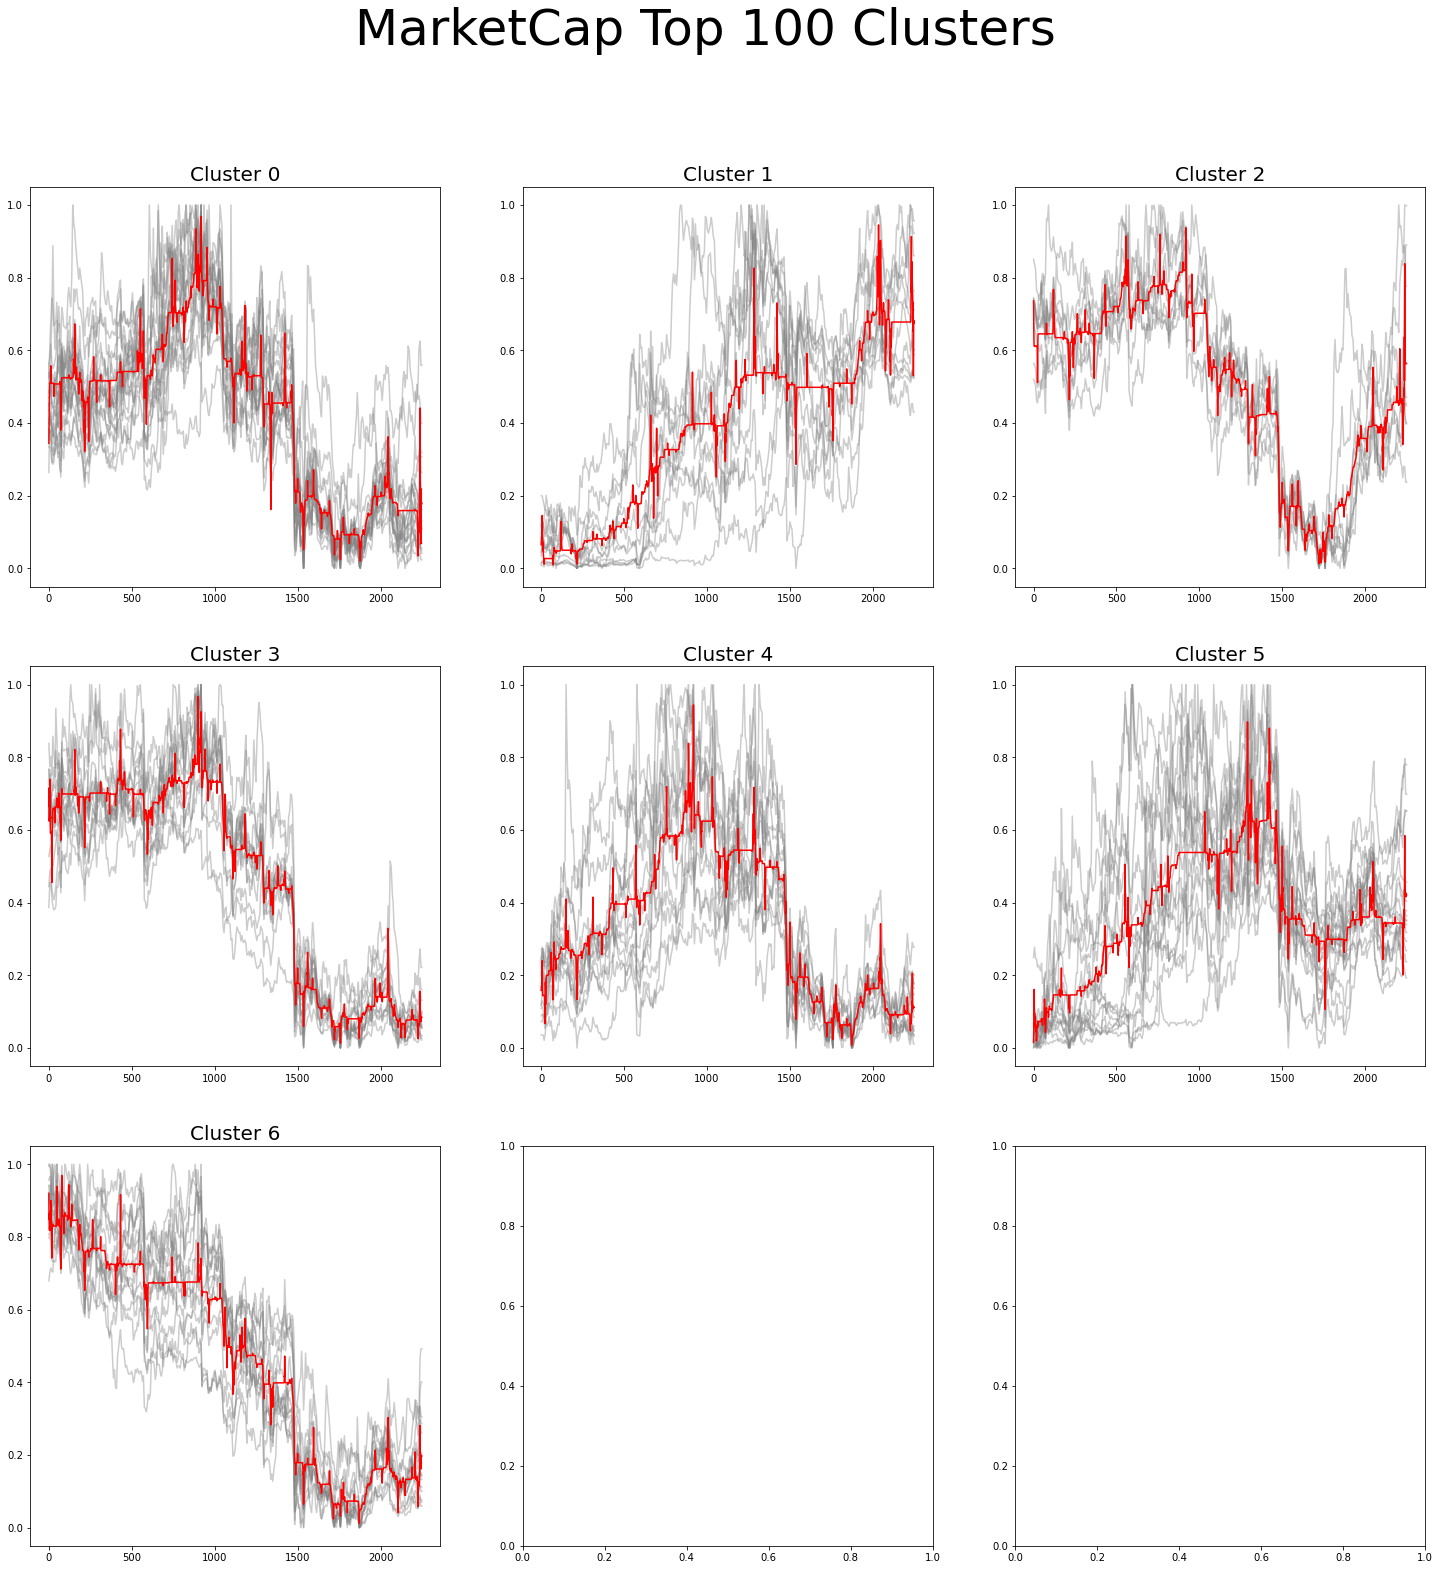

In [353]:
plot_count = 3

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('MarketCap Top 100 Clusters',fontsize=50)
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*3+column_j),fontsize=20)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.savefig('mc_100', facecolor='white', dpi=300)        
plt.show()

In [355]:
cluster_count=7

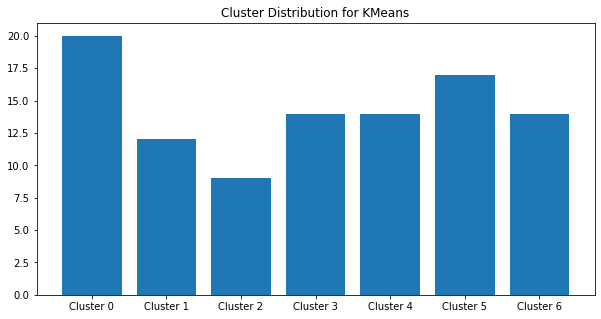

In [359]:
cluster_c = [len(mc_100_labels[mc_100_labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans(MC Top 100)",fontsize=20)
plt.bar(cluster_n,cluster_c, color='darkseagreen',alpha=0.7)
plt.savefig('mc_100_d', dpi=300)   
plt.show()

In [356]:
labels

array([4, 5, 1, 5, 6, 0, 1, 4, 1, 0, 1, 5, 0, 1, 6, 0, 4, 2, 5, 3, 0, 6,
       0, 3, 1, 2, 0, 1, 0, 3, 4, 0, 3, 6, 5, 5, 4, 2, 2, 6, 3, 5, 4, 0,
       1, 6, 0, 4, 1, 4, 5, 1, 6, 5, 2, 6, 0, 3, 1, 4, 1, 3, 0, 0, 3, 2,
       2, 4, 0, 5, 4, 0, 2, 0, 3, 6, 5, 5, 2, 0, 5, 0, 6, 3, 4, 3, 4, 3,
       0, 6, 5, 5, 4, 3, 6, 3, 5, 5, 6, 6], dtype=int64)

In [376]:
mc_100_labels=np.array([4, 5, 1, 5, 6, 0, 1, 4, 1, 0, 1, 5, 0, 1, 6, 0, 4, 2, 5, 3, 0, 6,
       0, 3, 1, 2, 0, 1, 0, 3, 4, 0, 3, 6, 5, 5, 4, 2, 2, 6, 3, 5, 4, 0,
       1, 6, 0, 4, 1, 4, 5, 1, 6, 5, 2, 6, 0, 3, 1, 4, 1, 3, 0, 0, 3, 2,
       2, 4, 0, 5, 4, 0, 2, 0, 3, 6, 5, 5, 2, 0, 5, 0, 6, 3, 4, 3, 4, 3,
       0, 6, 5, 5, 4, 3, 6, 3, 5, 5, 6, 6])

In [383]:
temp={}

for i in range(100):
    temp[name_100[i]]=list(mc_100_labels)[i]

cluster_100={'cluster 0':[],'cluster 1':[],'cluster 2':[],'cluster 3':[],'cluster 4':[],'cluster 5':[],'cluster 6':[]}
count=1    
for key, value in temp.items():
    for i in range(7):
        if value==i:
            cluster_100['cluster '+str(i)].append(key+'('+str(count)+')')
            count+=1

In [384]:
cluster_100

{'cluster 0': ['XRP(6)',
  'DOGE(10)',
  'LINK(13)',
  'ALGO(16)',
  'TRX(21)',
  'XLM(23)',
  'VET(27)',
  'AXS(29)',
  'THETA(32)',
  'BTT(44)',
  'KSM(47)',
  'AR(57)',
  'DASH(63)',
  'MINA(64)',
  'XEM(69)',
  'TFUEL(72)',
  'BNT(74)',
  'QTUM(80)',
  'AUDIO(82)',
  'ZRX(89)'],
 'cluster 1': ['BNB(3)',
  'LUNA(7)',
  'AVAX(9)',
  'MATIC(11)',
  'NEAR(14)',
  'MANA(25)',
  'SAND(28)',
  'GALA(45)',
  'CRV(49)',
  'LRC(52)',
  'BAT(59)',
  'ROSE(61)'],
 'cluster 2': ['ATOM(18)',
  'HBAR(26)',
  'XMR(38)',
  'AAVE(39)',
  'CELO(55)',
  'YFI(66)',
  'RVN(67)',
  'SUSHI(73)',
  'ZIL(79)'],
 'cluster 3': ['BCH(20)',
  'FTT(24)',
  'FIL(30)',
  'ETC(33)',
  'EOS(41)',
  'NEO(58)',
  'WAVES(62)',
  'COMP(65)',
  'OMG(75)',
  'ICX(84)',
  'PERP(86)',
  'BTG(88)',
  'ONT(94)',
  'SKL(96)'],
 'cluster 4': ['BTC(1)',
  'DOT(8)',
  'LTC(17)',
  'EGLD(31)',
  'KLAY(37)',
  'GRT(43)',
  'RUNE(48)',
  'MKR(50)',
  'CHZ(60)',
  'HOT(68)',
  '1INCH(71)',
  'ZEN(85)',
  'SC(87)',
  'UMA(93)'],
 'clu

## 6. MarketCap Top 200

In [342]:
name_200=MarketCap[:200]

In [343]:
mc_200=findmarketcap(name_200,1641355200000-(300000*12*24*90))

제거된 coin
CVX 2022-01-13 02:00:00
AMP 2021-12-13 20:00:00
SPELL 2022-01-13 20:00:00
RNDR 2021-12-17 20:00:00
SYS 2021-10-14 20:00:00
FLUX 2021-12-30 20:00:00
FXS 2021-12-30 20:00:00
ENS 2021-11-30 20:00:00
ILV 2021-10-12 20:00:00
MOVR 2021-11-28 20:00:00
ANY 2021-12-24 20:00:00
YGG 2021-10-14 20:00:00
PLA 2021-12-13 20:00:00
JASMY 2021-12-13 02:00:00
RGT 2021-11-25 20:00:00
BICO 2021-12-29 20:00:00
ALCX 2021-12-20 20:00:00
KP3R 2021-12-02 20:00:00
POWR 2021-12-07 20:00:00
PYR 2021-12-16 20:00:00
JOE 2022-01-17 20:00:00
RAD 2021-10-27 20:00:00
DAR 2021-11-24 20:00:00
MC 2021-12-22 20:00:00
VOXEL 2022-01-04 02:00:00
FIDA 2021-10-21 02:00:00
BETA 2021-10-29 02:00:00
AGLD 2021-10-25 20:00:00
CHESS 2021-11-11 20:00:00
RARE 2021-10-31 20:00:00
개수 : 30
기간 : 2021-10-03 20:00:00 - 2022/01/05 13:20:00 (GALA상장시점 기준)



In [345]:
mc_200

In [170]:
#minmax시 “ValueError: Expected 2D array, got 1D array instead”발생 -> 데이터 프레임으로 변환후 minmax적용
x=mc_200
x=MinMaxScaler().fit_transform(x)
x=pd.DataFrame(x,columns=[name_200])
x.columns=name_200
x

,BTC,ETH,BNB,SOL,ADA,XRP,LUNA,DOT,AVAX,DOGE,...,KMD,MFT,AVA,BOND,LIT,DATA,COS,TROY,FORTH,CTXC
0,0.088345,0.043155,0.121485,0.249566,0.956960,0.511406,0.114649,0.269963,0.199888,0.368039,...,0.660725,0.342872,0.887524,0.383147,0.246475,0.113162,0.019492,0.301467,0.488121,0.053859
1,0.089301,0.044963,0.122485,0.254209,0.958639,0.517123,0.115389,0.270576,0.199757,0.369956,...,0.674391,0.342828,0.886986,0.382967,0.248825,0.113178,0.019000,0.335074,0.487041,0.053120
2,0.090257,0.046771,0.123485,0.258851,0.960317,0.522841,0.116128,0.271188,0.199626,0.371872,...,0.688057,0.342784,0.886447,0.382787,0.251175,0.113194,0.018508,0.368681,0.485961,0.052382
3,0.091214,0.048580,0.124484,0.263494,0.961996,0.528559,0.116868,0.271801,0.199496,0.373789,...,0.701723,0.342739,0.885908,0.382607,0.253525,0.113210,0.018015,0.402288,0.484881,0.051644
4,0.092170,0.050388,0.125484,0.268136,0.963675,0.534276,0.117608,0.272413,0.199365,0.375706,...,0.715389,0.342695,0.885370,0.382427,0.255874,0.113226,0.017523,0.435895,0.483801,0.050905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.164389,0.160655,0.078216,0.126755,0.102467,0.088423,0.213231,0.055254,0.044276,0.348450
2246,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.164389,0.160655,0.078216,0.126755,0.102467,0.088423,0.213231,0.055254,0.044276,0.348450
2247,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.164389,0.160655,0.078216,0.126755,0.102467,0.088423,0.213231,0.055254,0.044276,0.348450
2248,0.011281,0.317888,0.430071,0.237244,0.099817,0.130681,0.763508,0.176412,0.588117,0.068402,...,0.164389,0.160655,0.078216,0.126755,0.102467,0.088423,0.213231,0.055254,0.044276,0.348450


In [171]:
mySeries = []
namesofMySeries = name_200
for i in name_200:
    mySeries.append(x[i].squeeze())

In [172]:
km = TimeSeriesKMeans(n_clusters=11, metric="dtw")

labels = km.fit_predict(mySeries)

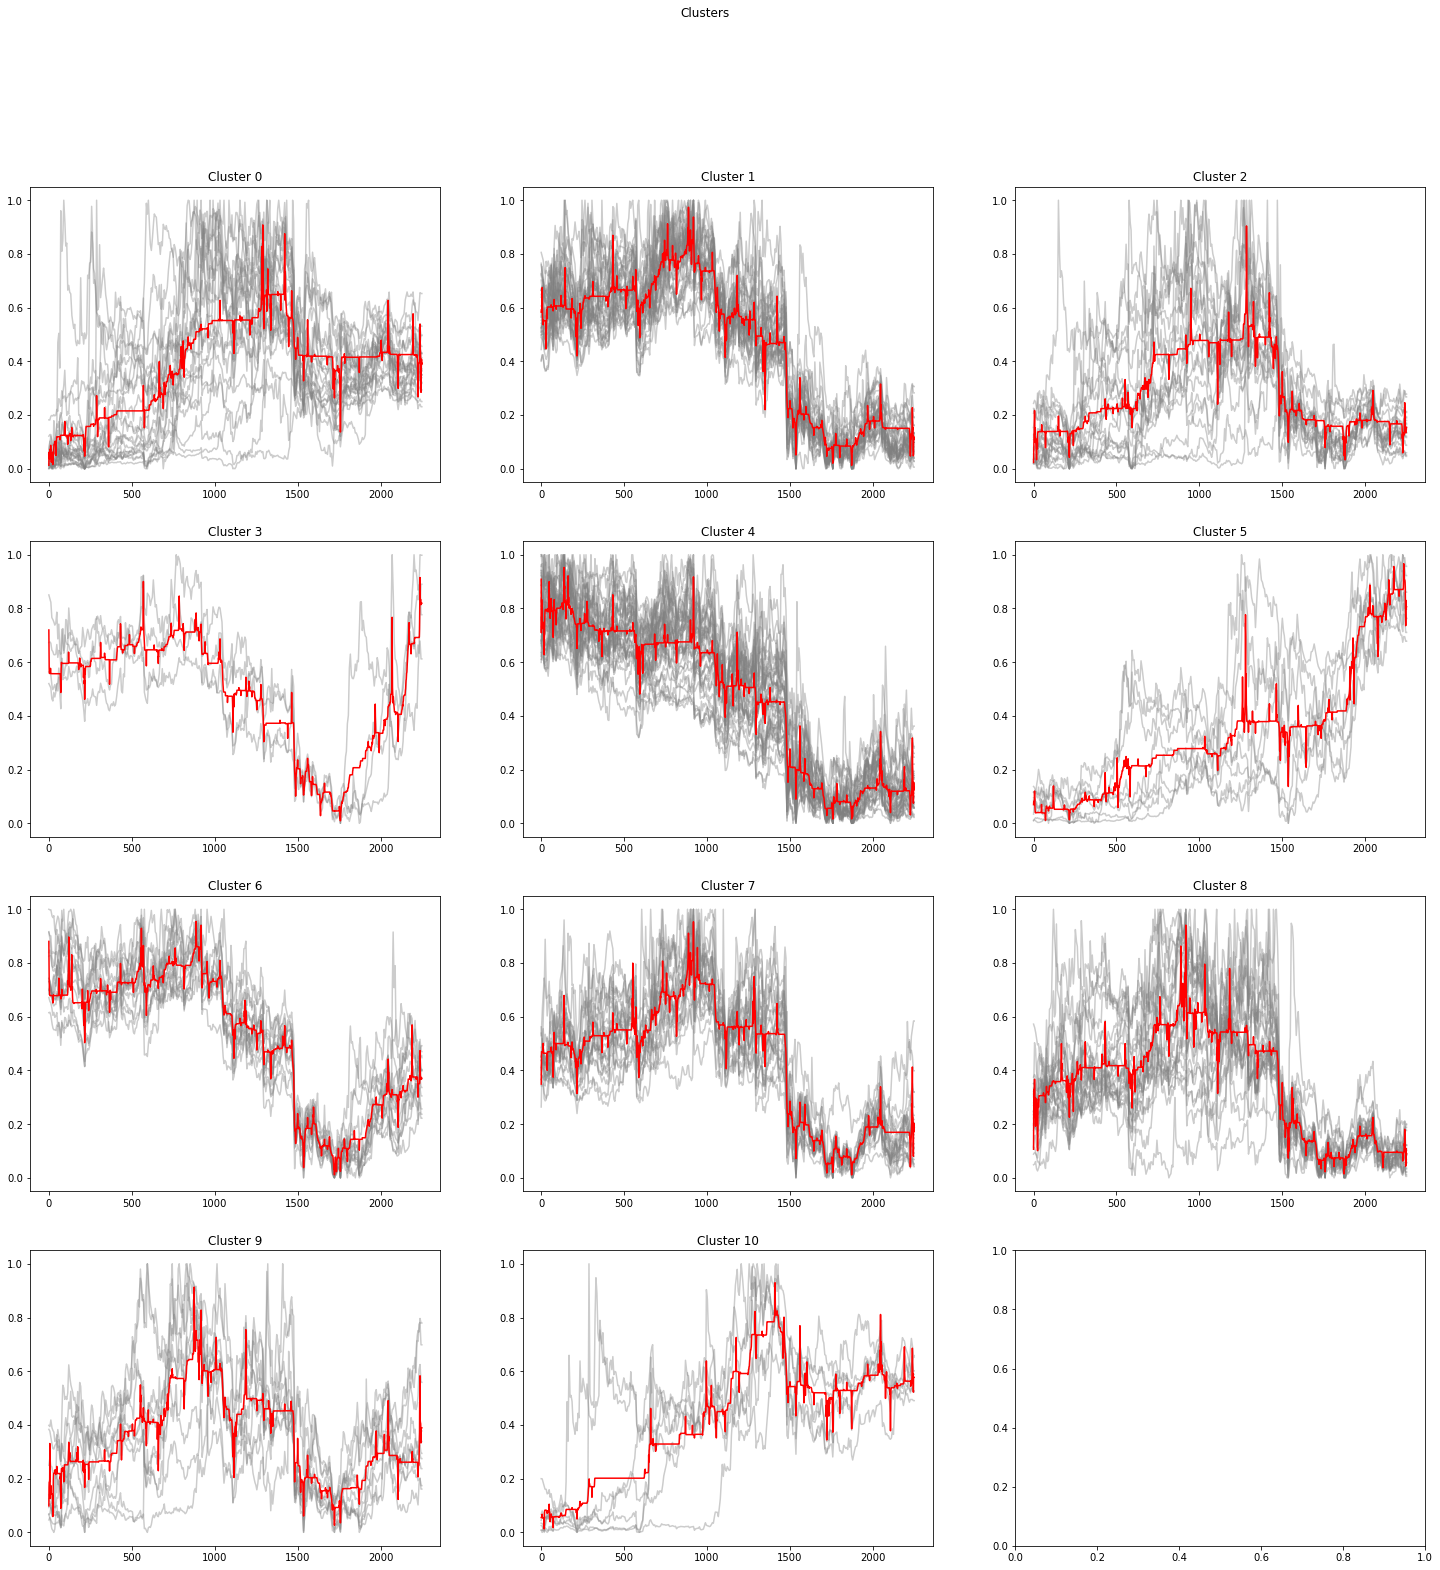

In [173]:
plot_count = 3

fig, axs = plt.subplots(4,3,figsize=(25,(25/3)*4))
fig.suptitle('MarketCap Top 200 Clusters',fontsize=50)
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*3+column_j),fontsize=20)
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0

plt.savefig('mc_200', facecolor='white', dpi=300)               
plt.show()

In [174]:
cluster_count=11

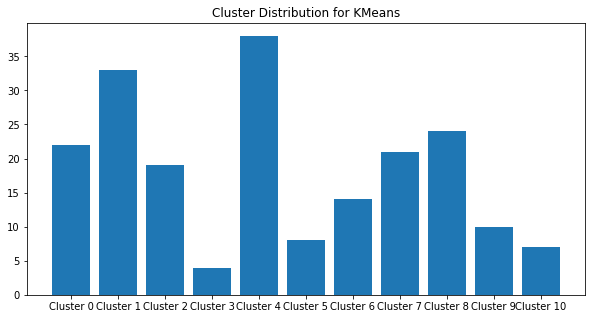

In [175]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(10,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.savefig('mc_200_d', dpi=300)       
plt.show()

In [176]:
labels

array([ 8,  0,  0,  9,  4,  1,  5,  8, 10,  7,  5,  0,  7,  5,  6,  7,  8,
        3,  9,  1,  8,  6,  7,  1, 10,  6,  8,  5,  7,  4,  2,  7,  4,  4,
        9,  0,  2,  6,  6,  4,  1, 10,  2,  1, 10,  4,  9,  2,  5,  8,  0,
        0,  4,  2,  6,  4,  9,  4, 10,  2,  5,  4,  7,  7,  1,  3,  3,  8,
        1,  0,  2,  1,  6,  7,  4,  4,  0,  0,  6,  7,  2,  7,  6,  4,  8,
        1,  8,  1,  7,  4,  0,  0,  2,  7,  4,  1,  0,  9,  4,  4,  0,  4,
        0,  1,  4,  1,  4,  0,  1,  4, 10,  8,  1,  1,  5,  1,  2,  9,  2,
        0,  6,  7,  2,  2,  1,  9,  7,  5,  1,  4,  8,  1,  1,  4,  4,  1,
        8,  7,  4,  1,  2,  4,  2,  0,  8,  4,  1,  4,  1,  6,  1,  7,  4,
        4,  4,  0,  2,  8,  1,  8, 10,  1,  8,  4,  1,  8,  1,  4,  0,  0,
        6,  4,  8,  9,  1,  2,  8,  4,  6,  9,  4,  8,  7,  7,  2,  0,  3,
        6,  8,  1,  4,  7,  4,  7,  8,  8,  2,  8,  1,  0], dtype=int64)

In [327]:
mc_200_labels=np.array([ 8,  0,  0,  9,  4,  1,  5,  8, 10,  7,  5,  0,  7,  5,  6,  7,  8,
        3,  9,  1,  8,  6,  7,  1, 10,  6,  8,  5,  7,  4,  2,  7,  4,  4,
        9,  0,  2,  6,  6,  4,  1, 10,  2,  1, 10,  4,  9,  2,  5,  8,  0,
        0,  4,  2,  6,  4,  9,  4, 10,  2,  5,  4,  7,  7,  1,  3,  3,  8,
        1,  0,  2,  1,  6,  7,  4,  4,  0,  0,  6,  7,  2,  7,  6,  4,  8,
        1,  8,  1,  7,  4,  0,  0,  2,  7,  4,  1,  0,  9,  4,  4,  0,  4,
        0,  1,  4,  1,  4,  0,  1,  4, 10,  8,  1,  1,  5,  1,  2,  9,  2,
        0,  6,  7,  2,  2,  1,  9,  7,  5,  1,  4,  8,  1,  1,  4,  4,  1,
        8,  7,  4,  1,  2,  4,  2,  0,  8,  4,  1,  4,  1,  6,  1,  7,  4,
        4,  4,  0,  2,  8,  1,  8, 10,  1,  8,  4,  1,  8,  1,  4,  0,  0,
        6,  4,  8,  9,  1,  2,  8,  4,  6,  9,  4,  8,  7,  7,  2,  0,  3,
        6,  8,  1,  4,  7,  4,  7,  8,  8,  2,  8,  1,  0])

In [381]:
temp={}

for i in range(200):
    temp[name_200[i]]=list(mc_200_labels)[i]

cluster_200={'cluster 0':[],'cluster 1':[],'cluster 2':[],'cluster 3':[],'cluster 4':[],'cluster 5':[],'cluster 6':[],'cluster 7':[],'cluster 8':[],'cluster 9':[],'cluster 10':[]}
count=1    
for key, value in temp.items():
    for i in range(11):
        if value==i:
            cluster_200['cluster '+str(i)].append(key+'('+str(count)+')')
            count+=1

In [382]:
cluster_200

{'cluster 0': ['ETH(2)',
  'BNB(3)',
  'SHIB(12)',
  'HNT(36)',
  'ENJ(51)',
  'LRC(52)',
  'IOTX(70)',
  'LPT(77)',
  'WAXP(78)',
  'STORJ(91)',
  'CKB(92)',
  'HIVE(97)',
  'NU(101)',
  'CHR(103)',
  'SUPER(108)',
  'PAXG(120)',
  'POLS(144)',
  'GTC(156)',
  'STPT(169)',
  'SFP(170)',
  'WNXM(186)',
  'CTXC(200)'],
 'cluster 1': ['XRP(6)',
  'BCH(20)',
  'FTT(24)',
  'EOS(41)',
  'BTT(44)',
  'COMP(65)',
  'XEM(69)',
  'TFUEL(72)',
  'PERP(86)',
  'BTG(88)',
  'SKL(96)',
  'RAY(104)',
  'DGB(106)',
  'NANO(109)',
  'FET(113)',
  'JST(114)',
  'DENT(116)',
  'COTI(125)',
  'LSK(129)',
  'ALPHA(132)',
  'VTHO(133)',
  'TWT(136)',
  'CVC(140)',
  'STMX(147)',
  'BAND(149)',
  'BAKE(151)',
  'TRU(159)',
  'MIR(162)',
  'EPS(165)',
  'CLV(167)',
  'TKO(175)',
  'DODO(190)',
  'FORTH(199)'],
 'cluster 2': ['EGLD(31)',
  'KLAY(37)',
  'GRT(43)',
  'RUNE(48)',
  'ZEC(54)',
  'CHZ(60)',
  '1INCH(71)',
  'ANKR(81)',
  'UMA(93)',
  'ALICE(117)',
  'MBOX(119)',
  'CTSI(123)',
  'REQ(124)',
  'O